In [1]:
# Lesson from Intro to Cultural Analytics - https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/08-Topic-Modeling-Text-Files.html

In [2]:
path_to_mallet = "/Users/ewelch/mallet-2.0.8/bin/mallet"

In [3]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [14]:
directory = "../REL560-Examples/data/Example_texts/history/NYT-Obituaries/"

In [15]:
files = glob.glob(f"{directory}/*.txt")

files

['../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1945-Adolf-Hitler.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1915-F-W-Taylor.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1975-Chiang-Kai-shek.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1984-Ethel-Merman.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1953-Jim-Thorpe.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1964-Nella-Larsen.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1955-Margaret-Abbott.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1984-Lillian-Hellman.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1959-Cecil-De-Mille.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1928-Mabel-Craty.txt',
 '../REL560-Examples/data/Example_texts/history/NYT-Obituaries/1973-Eddie-Rickenbacker.txt',
 '../REL560-Examples/data/Examp

In [16]:
# If you need guidance on a program search help
help(little_mallet_wrapper)

Help on package little_mallet_wrapper:

NAME
    little_mallet_wrapper

PACKAGE CONTENTS
    little_mallet_wrapper

FILE
    /Users/ewelch/opt/anaconda3/envs/REL560/lib/python3.9/site-packages/little_mallet_wrapper/__init__.py




In [17]:
# If you need guidance on a program search help

help(glob)

Help on module glob:

NAME
    glob - Filename globbing utility.

MODULE REFERENCE
    https://docs.python.org/3.9/library/glob
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

FUNCTIONS
    escape(pathname)
        Escape all special characters.
    
    glob(pathname, *, recursive=False)
        Return a list of paths matching a pathname pattern.
        
        The pattern may contain simple shell-style wildcards a la
        fnmatch. However, unlike fnmatch, filenames starting with a
        dot are special cases that are not matched by '*' and '?'
        patterns.
        
        If recursive is true, the pattern '**' will match any files and
        zero or more directories and subdirectories.
    
    ig

In [18]:
#Loading in files (prepares raw text for topic modeling according to little mallet wrapper)

training_data = []

for file in files:
    with open(file, encoding="utf-8") as f:
        text = f.read()
    processed_text = little_mallet_wrapper.process_string(text, numbers="remove")
    training_data.append(processed_text)

In [19]:
#Loading in files (original text that was in the text file)

original_texts = []

for file in files:
    with open(file, encoding="utf-8") as f:
        text = f.read()
    original_texts.append(text)

In [20]:
obit_titles = [Path(file).stem for file in files]

obit_titles

['1945-Adolf-Hitler',
 '1915-F-W-Taylor',
 '1975-Chiang-Kai-shek',
 '1984-Ethel-Merman',
 '1953-Jim-Thorpe',
 '1964-Nella-Larsen',
 '1955-Margaret-Abbott',
 '1984-Lillian-Hellman',
 '1959-Cecil-De-Mille',
 '1928-Mabel-Craty',
 '1973-Eddie-Rickenbacker',
 '1989-Ferdinand-Marcos',
 '1991-Martha-Graham',
 '1997-Deng-Xiaoping',
 '1938-George-E-Hale',
 '1885-Ulysses-Grant',
 '1909-Sarah-Orne-Jewett',
 '1957-Christian-Dior',
 '1987-Clare-Boothe-Luce',
 '1976-Jacques-Monod',
 '1954-Getulio-Vargas',
 '1979-Stan-Kenton',
 '1990-Leonard-Bernstein',
 '1972-Jackie-Robinson',
 '1998-Fred-W-Friendly',
 '1991-Leo-Durocher',
 '1915-B-T-Washington',
 '1997-James-Stewart',
 '1981-Joe-Louis',
 '1983-Muddy-Waters',
 '1942-George-M-Cohan',
 '1989-Samuel-Beckett',
 '1962-Marilyn-Monroe',
 '2000-Charles-M-Schulz',
 '1967-Gregory-Pincus',
 '1894-R-L-Stevenson',
 '1978-Bruce-Catton',
 '1982-Arthur-Rubinstein',
 '1875-Andrew-Johnson',
 '1974-Charles-Lindbergh',
 '1964-Rachel-Carson',
 '1953-Marjorie-Rawlings',


# Create the Model of Topics

In [21]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 379
Mean Number of Words per Document: 1314.6
Vocabulary Size: 35983


In [22]:
# Choose number of topics
num_topics = 15
training_data = training_data

In [25]:
# Telling it where to write everything we produce
output_directory_path = 'data/outputs/topic-model-output/NYT-Obit'

In [26]:
# First create the output directory if it does not already exist

Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

# Then create paths for all of the files Mallet will output

path_to_training_data = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [28]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 19800
total tokens: 498252
<10> LL/token: -10.14825
<20> LL/token: -9.78134
<30> LL/token: -9.65254
<40> LL/token: -9.58729

0	0.33333	miss film theater movie broadway films hollywood movies made actor love ochs role dance actress three sinatra song director star 
1	0.33333	soviet party mao communist china chinese stalin union moscow deng political khrushchev revolution one economic world atomic seemed brezhnev time 
2	0.33333	made first great german hitler germany time could years league record small second held man soon become world two prince 
3	0.33333	music band jazz years stage playing played musical piano new carnegie two show style composer last goodman would first concert 
4	0.33333	miss book wrote published books work life writing one story writer years author many read old first also write time 
5	0.33333	said wrote life children first school man also called years recalled won among child human cen

[beta: 0.0257] 
<210> LL/token: -9.28876
[beta: 0.03147] 
<220> LL/token: -9.34246
[beta: 0.03398] 
<230> LL/token: -9.34914
[beta: 0.03524] 
<240> LL/token: -9.34234

0	0.23021	miss film theater broadway films movie hollywood years movies stage actor television show made new director role actress star won 
1	0.11034	soviet mao china communist party stalin chinese deng chiang moscow khrushchev communists revolution atomic united world union brezhnev oppenheimer military 
2	0.47614	great german hitler germany first one england made war could queen london time france prince world visit father years english 
3	0.12016	music band jazz piano musical sinatra composer new goodman orchestra played stravinsky concert armstrong bernstein musicians playing davis years works 
4	0.35001	miss book published wrote writing books writer life novel author story magazine read new literary write stories written work first 
5	0.75789	said also first later wrote like american children called life one often 

[beta: 0.0405] 
<410> LL/token: -9.21451
[beta: 0.04063] 
<420> LL/token: -9.20705
[beta: 0.04071] 
<430> LL/token: -9.20647
[beta: 0.04068] 
<440> LL/token: -9.20228

0	0.1949	miss film theater films broadway movie hollywood stage actor movies years television made show director actress role won new york 
1	0.06144	soviet mao china party communist chinese deng stalin chiang moscow khrushchev communists revolution brezhnev oppenheimer acheson military sakharov union political 
2	0.14906	hitler german germany queen lord prince sir british england london victoria france made royal great english duke king war french 
3	0.09128	music band jazz piano sinatra musical composer goodman years new concert stravinsky armstrong orchestra played bernstein playing musicians pianist works 
4	0.20904	miss book wrote published writing books writer novel author story life new literary stories write magazine read work poet years 
5	1.29737	said first one also later american like man life many never two w

[beta: 0.04203] 
<610> LL/token: -9.19956
[beta: 0.04188] 
<620> LL/token: -9.19567
[beta: 0.04209] 
<630> LL/token: -9.19939
[beta: 0.04205] 
<640> LL/token: -9.19464

0	0.17399	miss film broadway movie theater films hollywood movies stage actor director new show television actress york role made star career 
1	0.05992	soviet mao china party deng chinese stalin chiang moscow khrushchev communist revolution brezhnev communists union acheson sakharov leader gromyko political 
2	0.12427	hitler german queen germany sir prince lord british france england churchill first victoria great london english berlin duke king war 
3	0.08455	music band jazz piano sinatra new musical composer goodman concert stravinsky works orchestra bernstein playing played armstrong musicians style davis 
4	0.1975	book miss wrote published writing new books writer author novel work mrs story york literary life stories magazine poet write 
5	1.34593	said first years one also later many two like became wrote american

[beta: 0.04236] 
<810> LL/token: -9.19531
[beta: 0.04244] 
<820> LL/token: -9.19392
[beta: 0.04256] 
<830> LL/token: -9.19507
[beta: 0.04238] 
<840> LL/token: -9.19799

0	0.17563	miss film theater broadway movie films hollywood actor movies stage show york director television made role actress career won star 
1	0.0563	soviet mao china party chinese deng chiang khrushchev stalin moscow communist revolution brezhnev communists union sakharov space gromyko military russian 
2	0.1278	hitler german queen germany england british sir prince lord war churchill victoria france britain berlin london english duke royal nazi 
3	0.07791	music band jazz piano musical sinatra goodman composer orchestra stravinsky concert armstrong bernstein musicians playing new hall played davis pianist 
4	0.20096	miss book published wrote writing books writer author novel new work story stories mrs literary poet read york magazine write 
5	1.41598	said years one first later also many two life like man wrote time b

Complete


([['miss',
   'film',
   'theater',
   'broadway',
   'movie',
   'films',
   'hollywood',
   'movies',
   'actor',
   'stage',
   'made',
   'television',
   'director',
   'show',
   'actress',
   'role',
   'dance',
   'star',
   'career',
   'york'],
  ['soviet',
   'mao',
   'china',
   'party',
   'deng',
   'chiang',
   'chinese',
   'stalin',
   'khrushchev',
   'moscow',
   'communist',
   'revolution',
   'brezhnev',
   'political',
   'union',
   'space',
   'sakharov',
   'communists',
   'russian',
   'gromyko'],
  ['hitler',
   'german',
   'queen',
   'germany',
   'war',
   'sir',
   'british',
   'lord',
   'prince',
   'churchill',
   'england',
   'victoria',
   'france',
   'london',
   'britain',
   'berlin',
   'eden',
   'royal',
   'king',
   'english'],
  ['music',
   'band',
   'jazz',
   'piano',
   'musical',
   'sinatra',
   'goodman',
   'composer',
   'concert',
   'stravinsky',
   'orchestra',
   'playing',
   'armstrong',
   'bernstein',
   'works',
   

# View Results

In [30]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

In [32]:
for topic_number, topic in enumerate(topics):
    print(f"Topic {topic_number} \n\n{topic}\n")

Topic 0 

['miss', 'film', 'theater', 'broadway', 'movie', 'films', 'hollywood', 'movies', 'actor', 'stage', 'made', 'television', 'director', 'show', 'actress', 'role', 'dance', 'star', 'career', 'york']

Topic 1 

['soviet', 'mao', 'china', 'party', 'deng', 'chiang', 'chinese', 'stalin', 'khrushchev', 'moscow', 'communist', 'revolution', 'brezhnev', 'political', 'union', 'space', 'sakharov', 'communists', 'russian', 'gromyko']

Topic 2 

['hitler', 'german', 'queen', 'germany', 'war', 'sir', 'british', 'lord', 'prince', 'churchill', 'england', 'victoria', 'france', 'london', 'britain', 'berlin', 'eden', 'royal', 'king', 'english']

Topic 3 

['music', 'band', 'jazz', 'piano', 'musical', 'sinatra', 'goodman', 'composer', 'concert', 'stravinsky', 'orchestra', 'playing', 'armstrong', 'bernstein', 'works', 'musicians', 'davis', 'style', 'hall', 'played']

Topic 4 

['miss', 'book', 'published', 'wrote', 'writing', 'books', 'writer', 'author', 'novel', 'mrs', 'work', 'story', 'literary', 

In [37]:
# Look at distribution of topics in a particular document (tells us how common they are)

topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

#[number of document in list found in folder]

topic_distributions[32]

[0.2064302386971508,
 8.353328033094566e-05,
 0.0017350741787058516,
 0.00014095394257858398,
 0.006542045025930796,
 0.5448316639401964,
 0.00023209063291400095,
 0.028072080024351874,
 0.0006059442994938117,
 0.035812562862912255,
 0.000310549895112056,
 0.01091746123185928,
 0.0002990887622143581,
 0.1637536554704203,
 0.00023305775582863864]

In [39]:
# Same thing as above, but we are naming the document instead of doing 32 (and printing it in a more readable way)

obituary_to_check = "1962-Marilyn-Monroe"

obit_number = obit_titles.index(obituary_to_check)

In [41]:
print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"Topic {topic_number} {topic[:6]} \nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for 1962-Marilyn-Monroe

Topic 0 ['miss', 'film', 'theater', 'broadway', 'movie', 'films'] 
Probability: 0.206

Topic 1 ['soviet', 'mao', 'china', 'party', 'deng', 'chiang'] 
Probability: 0.0

Topic 2 ['hitler', 'german', 'queen', 'germany', 'war', 'sir'] 
Probability: 0.002

Topic 3 ['music', 'band', 'jazz', 'piano', 'musical', 'sinatra'] 
Probability: 0.0

Topic 4 ['miss', 'book', 'published', 'wrote', 'writing', 'books'] 
Probability: 0.007

Topic 5 ['said', 'years', 'one', 'later', 'also', 'new'] 
Probability: 0.545

Topic 6 ['company', 'art', 'ford', 'picasso', 'oil', 'business'] 
Probability: 0.0

Topic 7 ['general', 'gen', 'grant', 'army', 'war', 'president'] 
Probability: 0.028

Topic 8 ['war', 'united', 'states', 'government', 'party', 'president'] 
Probability: 0.001

Topic 9 ['baseball', 'game', 'louis', 'won', 'team', 'ruth'] 
Probability: 0.036

Topic 10 ['president', 'house', 'roosevelt', 'republican', 'senator', 'state'] 
Probability: 0.0

Topic 11 ['

# Visualize Result

In [42]:
#Pick ten titles at random (*if doing all files, don't do this step)

import random
target_labels = random.sample(obit_titles, 10)

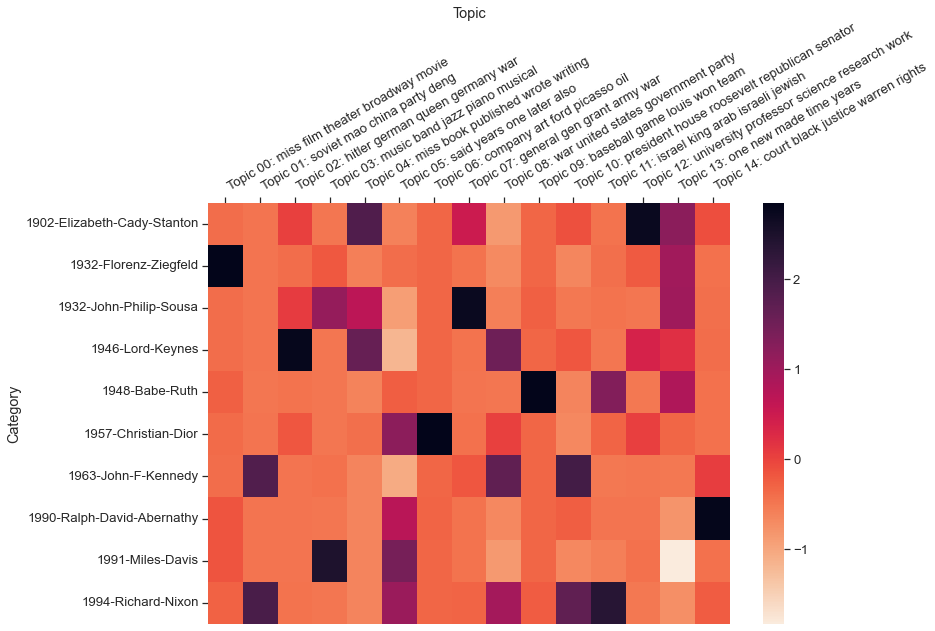

In [44]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
                                                       topic_distributions,
                                                       topics,
                                                       output_directory_path + '/categories_by_topics.pdf',
                                                       target_labels=target_labels,
                                                       dim= (13,9)
                                                       )
#If doing all titles instead of random:

# little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
#                                                        topic_distributions,
#                                                        topics,
#                                                        output_directory_path + '/categories_by_topics.pdf',
#                                                   ##   target_labels=CHANGE TO TITLE OFFULL LIST OF DOCS (THIS WOULD BE obit_titles,
#                                                        dim= (13,9)
#                                                        )

# Display top titles per topic

In [45]:
training_data_obit_titles = dict(zip(training_data, obit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [55]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    print(f"Topic {topic_number}\n\n{topics[topic_number]}\n")
    
    for probability,document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
            print(round(probability, 4), training_data_obit_titles[document] + "\n")
    return

In [56]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)

Topic 0

['miss', 'film', 'theater', 'broadway', 'movie', 'films', 'hollywood', 'movies', 'actor', 'stage', 'made', 'television', 'director', 'show', 'actress', 'role', 'dance', 'star', 'career', 'york']

0.5235 1996-Gene-Kelly

0.4947 1990-Rex-Harrison

0.484 1995-Ginger-Rogers

0.4776 1951-Fanny-Brice

0.4701 1989-Lucille-Ball



# Display Topic Words in Context

In [57]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topics=topics, topic_number=3, number_of_documents=3, custom_words=None):
    
    print(f"Topic {topic_number}\n\n{topics[topic_number]}\n")
    
    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
            
        probability = f"\n\n**{probability}**"
        obit_title = f"**{training_data_obit_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words
        
        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)
        
        display(Markdown(probability)), display(Markdown(obit_title)), display(Markdown(original_text))
    return

In [58]:
display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3)

Topic 3

['music', 'band', 'jazz', 'piano', 'musical', 'sinatra', 'goodman', 'composer', 'concert', 'stravinsky', 'orchestra', 'playing', 'armstrong', 'bernstein', 'works', 'musicians', 'davis', 'style', 'hall', 'played']





**0.5770777269665063**

**1983-Earl-Hines**

April 24, 1983

 OBITUARY

 Earl Hines, 77, Father of Modern Jazz Piano, Dies

 By JON PARELES

 Earl (Fatha) Hines, the father of modern **jazz** **piano**, died Friday in Oakland, Calif., after a heart attack. He was 77 years old. In his pioneering work with Louis Armstrong in the late 1920's, Mr.

 Hines virtually redefined **jazz** **piano**. With what he called ''trumpet **style**,'' Mr. Hines **played** horn-like solo lines in octaves with his right hand and spurred them with chords from his left. He thus carved a place for the **piano** as a solo instrument outside the rhythm section and defined the roles of both hands for the next generations of **jazz** pianists.

 Mr. Hines's strong right hand and angular melodic ideas continued to sound contemporary throughout his career. In the 1930's and 1940's, he led a Chicago big **band** that began the careers of the singers Billy Eckstine and Sarah Vaughan and included the saxophonists Wardell Gray and Budd Johnson. That **band** became an incubator for be-bop in the early 1940's, when it featured the trumpeter Dizzy Gillespie and the saxophonist Charlie

 Parker.

 Son of Two Musicians

 Earl Hines was born in Duquesne, Pa. His father was a trumpeter and his mother **played** **piano** and organ. He took up the trumpet as a child, but began studying classical **piano** at the age of 9. After three years of lessons, he decided he was more interested in **jazz** **piano**, and by the time he was 15 years old he was leading his own trio.

 Mr. Hines worked with big bands led by Lois B. Deppe in Pittsburgh and Carroll Dickerson and Sammy Stewart in Chicago, and in 1927 he joined a quintet led by Louis Armstrong at Chicago's Savoy Ballroom.

 With Mr. Armstrong, he made such recordings as ''West End Blues'' and ''Weather Bird,'' and in 1928 he recorded solos, including ''A Monday Date'' and ''Caution Blues,'' that established his **style** and have had a lasting influence on **jazz** **piano**.

 Mr. Hines started his own big **band** in 1928 at Chicago's Grand Terrace Ballroom, and stayed in residence there for more than a decade, although he toured for part of each year. His was one of the first black big bands to tour the South.

 Thn ''Jelly Jelly'' and ''Stormy Monday Blues.'' Although he left the Grand Terrace in 1940, Mr. Hines led a big **band** nearly continuously until 1947; at one point the group included a string section composed entirely of women.

 Origin of Nickname

 A Chicago disk jockey called him ''Fatha'' in the 1930's and the nickname - as in ''Father of modern **piano**'' -stayed with him. After dissolving his **band**, Mr. Hines worked with smaller groups. He rejoined Mr.

 Armstrong from 1948 to 1951, then led his own bands. In 1957, he toured Europe with an all-star group including the trombonist Jack Teagarden, but he spent much of the 1950's **playing** Dixieland **jazz** - **music** that he had not be Jack Teagarden, but he spent much of the 1950's **playing** Dixieland **jazz** - **music** that he had not been a part of - on the West Coast.

 He re-emerged with triumphant concerts and recordings in the early 1960's, and was elected a member of Downbeat magazine's **jazz** **hall** of fame in 1965. In 1966, the United States sponsored Mr. Hines' group on a tour of the Soviet Union, where he **played** for 92,000 people.

 Since the 1950's, Mr. Hines had been based in the San Francisco Bay area, and he continued to tour Europe, Japan and the United States through the early 1980's. He **played** his final engagement last weekend in San Francisco.

 Mr. Hines is survived by a granddaughter. He was divorced from his wife, Janie, in 1980.

 





**0.5640513078762094**

**1991-Miles-Davis**

September 29, 1991

 OBITUARY

 Miles Davis, Trumpeter, Dies; Jazz Genius, 65, Defined Cool

 By JON PARELES

 Miles Davis, the trumpeter and **composer** whose haunting tone and ever-changing **style** made him an elusive touchstone of **jazz** for four decades, died yesterday at St. John's Hospital and Health Center in Santa Monica, Calif. He was 65 years old.

 He died of pneumonia, respiratory failure and a stroke, his doctor, Jeff Harris, said in a statement released by the hospital.

 A spokeswoman for the hospital, Pat Kirk, said yesterday that Mr. Davis had been a patient there for several weeks.

 Mr. Davis's unmistakable, voicelike, nearly vibratoless tone -- at times distant and melancholy, at others assertive yet luminous -- has been imitated around the world.

 His solos, whether ruminating on a whispered ballad melody or jabbing against a beat, have been models for generations of **jazz** **musicians**. Other trumpeters play faster and higher, but more than in any technical feats Mr. Davis's influence lay in his phrasing and sense of space. "I always listen to what I can leave out," he would say.

 Equally important, Mr. Davis never settled into one **style**; every few years he created a new lineup and format for his groups. Each phase brought denunciations from critics; each, except for the most recent one, has set off repercussions throughout modern **jazz**. "I have to change," he once said. "It's like a curse."

 Mr. Davis came of age in the be-bop era; many successive styles -- cool **jazz**, hard-bop, modal **jazz**, **jazz**-rock, **jazz**-funk -- were sparked or ratified by his example. Throughout his career he was grounded in the blues, but he also drew on pop, flamenco, classical **music**, rock, Arab **music** and Indian **music**. Musicians he discovered often moved on to innovations of their own.

 Mr. Davis was also known for a volatile personality and arrogant public pronouncements, and for a stage presence that could be charismatic or aloof. For a while, he turned his back on audiences as he **played** and walked offstage when he was not soloing. His public persona was flamboyant, uncompromising and fiercely independent; he drove Ferraris and Lamborghinis and did not mince words when he disliked something.

 Yet his **music** was deeply collaborative. He spurred his sidemen to find their own **musical** voices and was inspired by them in turn.

 Trumpet at 13

 Miles Dewey Davis 3d was born May 25, 1926, in Alton, Ill., the son of an affluent dental surgeon, and grew up in East St. Louis, Ill. On his 13th birthday, he was given a trumpet and lessons with a local **jazz** musician, Elwood Buchanan. He got his **musicians**' union card at 15 so he could perform around St. Louis with Eddie Randall's Blue Devils.

 Clark Terry, the trumpeter, one of his early idols, became Mr. Davis's mentor, and his local reputation grew quickly. Mr. Davis's parents made him turn down early offers to join big bands.

 But in 1944 the Billy Eckstine **band**, which then included two men who were beginning to create be-bop -- Charlie Parker on alto saxophone and Dizzy Gillespie on trumpet -- arrived in St. Louis with an ailing third trumpeter. Mr. Davis sat in for two weeks. The experience made him decide to move to New York, the center of the be-bop revolution.

 He enrolled in the Juilliard School of Music in September 1944, and for his first months in New York he studied classical **music** by day and **jazz** by night, in the clubs of 52d Street and Harlem. Mr. Parker, who roomed with Mr. Davis for a time, and Mr. Gillespie introduced him to the coterie of be-bop **musicians**. From them he learned the harmonic vocabulary of be-bop and began to forge a solo **style**.

 Mr. Davis made his first recording in May 1945 backing up a singer, Rubberlegs Williams. He also performed in the 52d Street clubs with the saxophonists Coleman Hawkins and Eddie (Lockjaw) Davis. In the fall of that year he joined Charlie Parker's quintet and dropped out of Juilliard. "Up at Juilliard," Mr. Davis said later, "I **played** in the symphony, two notes, 'bop-bop,' every 90 bars, so I said, 'Let me out of here,' and then I left."

 With Parker's quintet, Mr. Davis recorded one of the first be-bop sessions in November 1945. It yielded the singles "Now's the Time" and "Koko." For the next few years he worked primarily with Parker, and his tentative, occasionally shaky **playing** evolved into a pared-down, middle-register **style** that created a contrast with Parker's aggressive forays. He made his first recording as a leader on Aug. 14, 1947, with a quintet that included Parker on tenor saxophone.

 But Mr. Davis was moving away from the extroversion of early be-bop, and in 1948 he began to experiment with a new, more elaborately orchestrated **style** that would become known as "cool **jazz**."

 Working with the arrangers Gil Evans (a frequent collaborator throughout his career), John Lewis and Gerry Mulligan, Mr. Davis brought a nine-piece **band** to the Royal Roost in New York to play rich, ruminative ensemble pieces, with solos floating in diffuse clouds of harmony. Although the public showed little interest, Mr. Davis was able to record the **music** in 1949 and 1950, and it helped spawn a cerebral cool-**jazz** movement on the West Coast.

 Mr. Davis became a heroin addict in the early 1950's, performing infrequently and making erratic recordings. But in 1954 he overcame his addiction and began his first string of important small-group recordings. "Walkin'," a swaggering blues piece informed by the extended harmonies of be-bop, turned decisively away from cool **jazz** and announced the arrival of hard bop. During 1954 Mr. Davis recorded with such leading **musicians** as the saxophonist Sonny Rollins and the pianists Horace Silver and Thelonious Monk.

 Over the next year, he made a triumphant appearance at the Newport Jazz Festival and assembled his first important quintet, with John Coltrane on tenor saxophone, Red Garland on **piano**, Paul Chambers on bass and Philly Joe Jones on drums.

 Breakthrough to Popularity

 Like many of the Davis bands to follow, it seemed to be an incompatible grouping in prospect, mixing the suavity and harmonic nuances of Garland and Chambers with the forcefulness of Jones and the raw energy of Coltrane.

 But it achieved a remarkable balance of delicacy and drive, with a sense of space and dynamics influenced by the pianist Ahmad Jamal's trio, and it brought Mr. Davis his first general popularity.

 The quintet recorded six albums in 1955-56, four of them in marathon sessions to fulfill Mr. Davis's recording contract with the independent Prestige Records label so he could sign with Columbia, a major label.

 In 1957 Mr. Davis had a throat operation to remove nodes from his vocal cords. Two days later he began shouting at someone who, he once said, "tried to convince me to go into a deal I didn't want." His voice was permanently damaged, reduced to a raspy whisper.

 During the late 1950's Mr. Davis alternated orchestral albums with Gil Evans arrangements -- "Miles Ahead" (1957), "Porgy and Bess" (1958) and "Sketches of Spain" (1960) -- with small-group sessions. He recorded the soundtrack for Louis Malle's film "Ascenseur Pour l'Echafaud" ("Elevator to the Gallows") with French **musicians**, then reconvened his quintet and added Julian (Cannonball) Adderley on alto saxophone. The sound track and the sextet's first album, "Milestones," signaled another metamorphosis, cutting back the harmonic motion of be-bop to make **music** with fewer chords and more ambiguous harmonies.

 Mood and Melodic Tension

 With "Kind of Blue" in 1959, that change was complete. Most of the pieces on "Kind of Blue" (composed by Mr. Davis or his new pianist, Bill Evans) were based on modal scales rather than chords. Mood and melodic tension became paramount, in **music** that was at times voluptuous and austere.

 From this point onward, Mr. Davis would return often to **music** based on static, stripped-down harmonies. John Coltrane, among others, was to make modal **jazz** one of the definitive styles of the 1960's.

 The Davis group's personnel fluctuated in the early 1960's until Mr. Davis settled on a new quintet in 1964, with Wayne Shorter (who became the group's main **composer**) on tenor saxophone,

 Herbie Hancock on **piano**, Ron Carter on bass and Tony Williams on drums. It was one of the most important ensembles in 1960's **jazz**, pushing tonal harmony to its limits and developing a dazzling rhythmic flexibility.

 On the albums "E.S.P.," "Miles Smiles," "The Sorcerer" and "Nefertiti," the group could swing furiously, then open up unexpected spaces or dissolve the beat into abstract waves of sound. The quintet defined an exploratory alternative to 1960's free **jazz**. The four sidemen also recorded prolifically on their own, extending the quintet's influence.

 Branching Into Rock Rhythms

 Mr. Davis had touched on rock rhythms in one selection on "E.S.P.," but with the 1968 albums "Miles in the Sky" and "Filles de Kilimanjaro," he began to experiment more seriously with rock rhythms, repeating bass lines and electronic instruments. He also began to work with open-ended compositions, based on rhythmic feeling, fragments of melody or bass patterns and his own on-the-spot directives.

 Mr. Davis expanded the group on "In a Silent Way" (1969) with three electric keyboards and electric guitar. Using static harmonics and a rock undercurrent, the **music** was eerie and reflective, at once abstract and grounded by the beat. "Bitches Brew" (1969), recorded by a larger group -- trumpeter, soprano saxophonist, bass clarinetist, two bassists, two or three keyboardists, three drummers and a percussionist -- was an aggressive, spooky sequel, roiling and churning with improvisations in every register.

 The two albums, along with performances at the Fillmore East and Fillmore West rock auditoriums, brought Mr. Davis's **music** to the rock audience; "Bitches Brew" became a best-selling album.

 Musicians who had worked with Mr. Davis from 1968-70 went on to lead the pioneering **jazz**-rock groups -- the Mahavishnu Orchestra, Tony Williams Lifetime, Weather Report and Return to Forever.

 Reaching Young Blacks

 Mr. Davis, meanwhile, was turning from rock toward funk; in interviews at the time, he talked about reaching young black audiences. His bands in the 1970's were anchored by a bassist, Michael Henderson, who had worked with Stevie Wonder, and they moved percussion and syncopated bass lines into the foreground. Around them, keyboards, saxophone, guitars and Mr. Davis's trumpet (now electrified, and often **played** through a wah-wah pedal) supplied rhythmic and textural effects as well as solos. "On the Corner" (1972), which also used Indian tabla drums and sitar, marked the change, and a pair of live albums, "Dark Magus" and "Pangaea," were even more jolting. Conventional melody and harmony had been virtually abandoned; the **music** was a thicket of rhythms and electronic textures. Critical reaction at the time was mixed, but those albums became an inspiration to the late-1970's "no wave" noise-rockers and a new generation of funk experimenters in the 1980's.

 By the end of 1975 mounting medical problems -- among them ulcers, throat nodes, hip surgery and bursitis -- forced Mr. Davis into a five-year retirement. In 1981 he returned with an album, "The

 Man With the Horn," a Kool Jazz Festival **concert** in New York and a **band** featuring Robert Irving 3d as keyboardist and co-producer.

 Although Mr. Davis's technique was intact, the **music** seemed for the first time to involve commercial calculations and a look backward at Mr. Davis's previous styles; he even **played** pop songs.

 With "You're Under Arrest" (1985), "Tutu" (1986) and "Music From Siesta" (1988), he recorded the **music** layer by layer, like pop albums, instead of leading **musicians** in live interaction. But on stage and on record, especially on the blues-oriented "Star People" (1983), there were still moments of the fierce beauty that is Mr. Davis's lasting legacy to American **music**.

 His last New York performance was in June as part of a double bill with B. B. King in the JVC Jazz Festival. In a review in The New York Times, Peter Watrous called the performance "a particularly bad night" for Mr. Davis. "The problem seemed simple," Mr. Watrous wrote. "Mr. Davis was incapable of sustaining more than a few notes at a time; the spareness seemed less an editorial decision than a decision handed down by physical constraints."

 Mr. Davis was married three times, to the dancer Frances Taylor, singer Betty Mabry and the actress Cicely Tyson. All ended in divorce. Survivors include a daughter, Cheryl; three sons, Gregory, Miles

 IV and Erin, and several grandchildren.

 Memorial services are being planned in New York City and East St. Louis, said Ms. Kirk at the hospital.

 





**0.5557435722330223**

**1993-Dizzy-Gillespie**

January 7, 1993

 OBITUARY

 Dizzy Gillespie, Who Sounded Some of Modern Jazz's Earliest Notes, Dies at 75

 By PETER WATROUS

 Dizzy Gillespie, the trumpet player whose role as a founding father of modern **jazz** made him a major figure in 20th-century American **music** and whose signature moon cheeks and bent trumpet made him one of the world's most instantly recognizable figures, died yesterday at Englewood Hospital in Englewood, N.J.

 Mr. Gillespie, who was 75, had been suffering for some time from pancreatic cancer, his press agent, Virginia Wicks, said.

 In a nearly 60-year career as a **composer**, **band** leader and innovative player, Mr. Gillespie cut a huge swath through the **jazz** world. In the early 40's, along with the alto saxophonist Charlie (Yardbird) Parker, he initiated be-bop, the sleek, intense, high-speed revolution that has become **jazz**'s most enduring **style**. In subsequent years he incorporated Afro-Cuban **music** into **jazz**, creating a new genre from the combination.

 In the naturally effervescent Mr. Gillespie, opposites existed. His **playing** -- and he performed constantly until nearly the end of his life -- was meteoric, full of virtuosic invention and deadly serious.

 But with his endlessly funny asides, his huge variety of facial expressions and his natural comic gifts, he was as much a pure entertainer as an accomplished artist. In some ways, he seemed to sum up all the possibilities of American popular art.

 From Carolina To the Big Bands

 John Birks Gillespie was born in Cheraw, S.C., on Oct. 21, 1917. His father, a bricklayer, led a local **band**, and by the age of 14 the young Gillespie was practicing the trumpet. He and his family moved to Philadelphia two years later, and Mr. Gillespie, though he thought about entering Temple University, quickly began a succession of professional jobs.

 He worked with Bill Doggett, the pianist and organist, who fired him for not being able to read **music** well enough, and then Frank Fairfax, a big-**band** leader whose **orchestra** included the trumpeter Charlie

 Shavers and the clarinetist Jimmy Hamilton. Mr. Gillespie was listening to the trumpeter Roy Eldridge, copying his solos and emulating his **style**, and was soon performing with Teddy Hill's **band** at the Savoy Ballroom on the basis of his ability to reproduce Mr. Eldridge's **style**.

 According to legend, it was Mr. Hill who gave Mr. Gillespie his nickname because of his odd clothing **style** and his fondness for practical jokes. Mr. Gillespie began cultivating his personality, putting his feet up on **music** stands during shows and regularly cracking jokes. But by May 1937 he was also recording improvisations with the Hill **band** and helping the performances by setting riffs behind soloists.

 Two years later, Mr. Gillepsie was considered accomplished enough to take part in a series of all-star recordings with Lionel Hampton, Benny Carter, Coleman Hawkins, Ben Webster and Chu Berry. He soloed on "Hot Mallets."

 That year, 1939, he joined Cab Calloway's **band**, one of the leading black orchestras of the era. Though a dance **band**, its **musicians**, who included the bassist Milt Hinton and the guitarist Danny Barker, liked to experiment. Mr. Gillespie would work on the harmonic substitutions that eventually became be-bop. Mr. Gillespie was a regular soloist with the **band**, and by then his harmonic sensibility was beginning to take shape.

 Joining With Parker To Mold New Style

 It was while touring with the Calloway **band** in 1940 that Mr. Gillespie met Charlie Parker in Kansas City. And it was with him that Mr. Gillespie began formulating the **style** that was eventually called be-bop. Along with a handful of other **musicians**, including Thelonious Monk and Kenny Clarke, Mr. Gillespie and Mr. Parker would regularly experiment.

 On live recordings of the period, especially the two solos on the tune "Kerouac," recorded in 1941 at Minton's Uptown Playhouse, a club in Harlem, can be heard his increasing interest in harmony, sleeker rhythms and a divergence from the **style** of Mr. Eldridge. Mr. Gillespie was blunt about his relationship with Mr. Parker, calling him "the other side of my heartbeat," and freely giving him credit for some of the rhythmic innovations of be-bop.

 At the same time that Mr. Gillespie was experimenting with the new **style**, he was regularly arranging and recording for Mr. Calloway, including one of his better improvisations on "Pickin' the

 Cabbage," a piece he composed and arranged. In September 1941, at the State Theater in Hartford, Mr. Gillespie was involved in an incident that shaped his reputation and his career. Mr. Calloway saw a spitball thrown on stage and thought Mr. Gillespie had done it; the two men fought, and Mr. Gillespie pulled a knife and put a cut in Mr. Calloway's posterior that required 10 stitches to close.

 Mr. Gillespie was fired from that job, but spent the next several years working with some of the biggest names in **jazz**, including Coleman Hawkins (who recorded the first version of Mr. Gillespie's classic "Woody 'N' You"), Benny Carter, Les Hite (for whom he recorded "Jersey Bounce," considered the first be-bop solo), Lucky Millinder, Earl Hines, Ella Fitzgerald and Duke Ellington. For Mr. Millinder he made "Little John Special," which includes a riff of Mr. Gillespie's that was later fleshed out into the composition "Salt Peanuts," one of his best-known pieces.

 The early 40's were a turbulent time for **jazz**. Be-bop was slowly making itself felt, but at the same time a series of disputes between recording companies and the **musicians**' union resulted in a recording ban, so Mr. Gillespie and Mr. Parker were rarely recorded. In 1943 Mr. Gillespie led a **band** with the be-bop bassist Oscar Pettiford at the Onyx Club on 52d Street in Manhattan. And in 1944, the singer Billy Eckstine took over part of the Earl Hines **band** and created the first be-bop **orchestra**, of which few recorded performaces exist. Mr. Gillespie was the **music** director, and the **band** featured his "Night in Tunisia."

 It was in 1945 that Mr. Gillespie began to break out. He undertook an ambitious recording schedule, recording with the pianist Clyde Hart and with Mr. Parker, Cootie Williams, Red Norvo, Sarah Vaughan and Slim Gaillard. And he began series of his own recordings that have since become some of **jazz**'s most important pieces.

 Recording under his own name for the first time, he made "I Can't Get Started," "Good Bait," "Salt Peanuts" and "Be-bop," during one session in January 1945.

 He followed it up with a recording date featuring Mr. Parker that included "Groovin' High," "Dizzy Atmosphere" and "All the Things You Are."

 These recordings, with their tight ensemble passages, precisely articulated rhythms and dissonance as part of the palate of **jazz**, were to influence **jazz** forever. Though Mr. Gillespie enjoyed **playing** for dancers, this was **music** that was meant first and foremost to be listened to. It was virtuosic in a way not heard before, and it was **music** that sent **music** students scurrying to their turntables to learn the improvisations by heart.

 They were also the recordings that captured Mr. Gillespie at his most impressive. His lines, jagged and angular, always seemed off balance. He used chromatic figures, and was not afraid to resolve a line on a vinegary, bitter note. And his improvising was eruptive; suddenly, a line would bolt into the high register, only to come tumbling down.

 Mr. Gillespie did more than just record in 1945. He put together the first of his big bands, and then formed a quintet with Mr. Parker that Mr. Gillespie called "The height of perfection in our **music**." It included Bud Powell on **piano**, Ray Brown on bass and Max Roach on drums. Later that year, Mr. Gillespie reformed the big **band**, called the Hepsations of 1945. Despitea tour of the South that was almost catastrophically unsuccessful, the **band** stayed together for the next four years. Another Revolution: Afro-Cuban Jazz

 It was with this big **band**, whose name became the Dizzy Gillespie Orchestra, that Mr. Gillespie created his second revolution in the late 1940's. An old friend, the Cuban trumpeter Mario Bauza, who had made it possible for him to join the Calloway **orchestra**, introduced Mr. Gillespie to the Cuban conga player Luciano (Chano Pozo) Gonzales. "Dizzy used to ask me about Cuban rhythms all the time," said Mr. Bauza. "I introduced him to Chano Pozo, and they wrote 'Manteca.' It was a good marriage of two cultures. That was the beginning of Afro-Cuban **jazz**. That blew up the whole world."

 Mr. Gillespie quickly produced the sketches for "Cubana Be" and "Cubana Bop," which were finished by the **composer** and arranger George Russell and included some of the first modal harmonies in **jazz**. And in "Manteca," Mr. Gillespie's collaboration with Mr. Pozo, he created a work that is still performed and quoted regularly, by both Latin orchestras and by **jazz** **musicians**. Without the sophisticated arrangements and the conjunction of Latin rhythms and **jazz** harmonies that Mr. Gillespie provided, both **jazz** and Latin **music** would be radically different today.

 The **band**'s highest moments, however, were when Mr. Gillespie -- in a move that characterized his career -- hired some of the young be-boppers on the scene. Among them were the pianist John Lewis, vibraphonist Milt Jackson, bassist Ray Brown and drummer Kenny Clarke, who went on to form the Modern Jazz Quartet. "It was an incredible experience because so much was going on," Mr. Lewis recalled. "Not only was he using these great be-bop arrangements but he was so encouraging. It was my first job, a formative experience."

 Mr. Gillespie's was the last great evolutionary big **band**, and during its tenure he hired the best soloists, from Jimmy Heath, James Moody and Sonny Stitt to John Coltrane and Paul Gonzalves. Arrangements like "Things to Come," with their exhilarating precision, were be-bop and orchestral landmarks, with dense harmonies and flashy rhythms.

 And it was with his big **band** that Mr. Gillespie fully developed the other side of his **musical** personality. With songs like "He Beeped When He Should Have Bopped," "Ool Ya Koo", "Oo

 Pop A Da" and others, he began popularizing the Bohemian, Dadaesque aspects of be-bop.

 Mr. Gillespie was a keen popularizer, and with his sense of comedy managed to make his shows into an extraordinary mixture of entertainment and esthetics. In so doing, he was following in the path of his ex-bandleader, Mr. Calloway, as well as Louis Armstrong and Fats Waller.

 From then on, he cultivated an audience that went beyond the average **jazz** fan, and it was this reputation that helped in his later career. And at the same time, be-bop fashion made an appearance, with Mr. Gillespie, in thick glasses and a beret, leading the way.

 The big-**band** business slowed down considerably in the late 1940's and early 50's, and Mr. Gillespie teamed with Stan Kenton's **orchestra** as a featured soloist. Then he began using a small group again.

 He formed his own record company in 1951, Dee Gee, which folded soon after. Mr. Gillespie and Mr. Parker recorded for Verve, with Mr. Monk, and he and Mr. Parker performed at Birdland in Manhattan the next year. He toured Europe and in 1953 joined Mr. Parker, Mr. Powell, Mr. Roach and the bassist Charles Mingus for a **concert** at Massey Hall in Toronto that became legendary for its disorganization and for acrimony among performers.

 It was also in 1953 that someone fell on Mr. Gillespie's trumpet, and bent it. When he **played** the misshapen instrument, Mr. Gillespie found he could hear the sound more clearly, and so decided to keep it. Along with those cheeks, it became his trademark.

 During the 1950's Mr. Gillespie recorded with with Stan Getz, Stuff Smith, Sonny Stitt, Mr. Eldridge and others. In 1956, he formed another big **band** and, at the behest of the United States State

 Department, toured the Middle East and South America. In 1957, Mr. Gillespie presided over "The Eternal Triangle," a recording that includes Mr. Stitt and Sonny Rollins and some of the hardest trumpet blowing ever recorded.

 Through the 1960's and 70's, Mr. Gillespie toured frequently, **playing** up to 300 shows a year, sometimes with an electric bassist and a guitarist, sometimes with a more traditional group. And in 1974 he signed with Pablo Records and began recording prolifically again. He won Grammies in 1975 and 1980, and he published his autobiography, "To Be or Not to Bop," in 1979.

 In the last decade, Mr. Gillespie's career seemed recharged, and he became ubiquitous on the **concert** circuit as a special guest. He formed a Latin big **band** that performed with Paquito De Rivera, among others, and he constantly shuffled the personnel of his small groups.

 Last year, in honor of his 75th birthday, Mr. Gillepsie **played** for four weeks at the Blue Note club in Manhattan, a stint that featured perhaps the greatest selection of **jazz** **musicians** ever brought together for a tribute. The month covered his career, from small groups, to Afro-Cuban **jazz** to a big **band**. As usual, he was his witty amiable self, in command of both the audience and his trumpet.

 Mr. Gillespie is survived by his wife of 52 years, Lorraine.

 Seeking the Best Of a Huge Output

 Dizzy Gillespie's recorded output was immense, spanning nearly 60 years and comprising hundreds of albums. Not all of his important recordings have been issued on CD, but the vinyl versions are worth hunting for.

 Afro Cuban Jazz Verve The Be-Bop Revolution RCA Bird and Diz Verve The Development of an American Artist Smithsonian Diz and Getz Verve Dizzy and the Double Six of Paris Phillips

 Dizzy at Newport Verve Dizzy on the French Riviera Phillips Dizzy's Diamonds Verve Duets Verve The Gifted Ones (with Roy Eldridge) Pablo Live at the Royal Festival

 Hall Enja Oscar Peterson and Dizzy Gillespie Pablo Portrait of Duke Ellington Verve Shaw Nuff Musicraft Sonny Side Up (with Sonny Stitt) Verve

 

